# Set ups

In [1]:
# Reloads library if changes are made to imported module, safe to comment out
%load_ext autoreload
%autoreload 2

Loading appropriate libraries

In [2]:
import torch
import torch.optim as optim

Uncomment to use Weights and Biases to track training progress

In [3]:
# import wandb
# wandb.init(project="centroid_loss",name="centroid_set_1",entity='hoyinchu')

Define settings for training the model and other hyperparameters

In [4]:
# Number of classes in the dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck',
           'Animals','Domesticated','Vehicles','Ground')
num_classes = len(classes)

RANDOM_STATE = 0 # for consistent sampling when evaluating
LEARNING_RATE = 0.001
batch_size = 8
num_epochs = 30

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

Detect if gpu is available

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


Load Modified CIFAR-10 Data

In [6]:
import data
dataloaders_dict = data.get_modified_cifar10_data_loader_dict(batch_size)

Checking if the original CIFAR10 training set is downloaded...
Files already downloaded and verified
Checking if the original CIFAR10 test set is downloaded...
Files already downloaded and verified
Applying transformation to both training and testing set
Dataloader dictionary complete


Initialize the model architecture

In [7]:
from models import initialize_model, CentroidNet
extractor_model = initialize_model("resnet", num_classes, feature_extract, use_pretrained=True)
centroid_net = CentroidNet(extractor_model)

Uncomment to set up Weights and Biases

In [8]:
# config = wandb.config
# config.learning_rate = LEARNING_RATE
# wandb.watch(centroid_net) # only call this once

Define an optimizer for the model

In [9]:
from models import get_all_params_to_update
centroid_net_params_to_update = get_all_params_to_update(centroid_net,feature_extract)
proposed_optimizer = optim.Adam(centroid_net_params_to_update, lr=LEARNING_RATE)

Params to learn:
	 extractor_net.fc.weight
	 extractor_net.fc.bias
	 fc_1.weight
	 fc_1.bias
	 fc_2.weight
	 fc_2.bias


# Defining Centroids

## Centroid Set 1

Define the centroids and radii

In [10]:
# Currently we hard code the centroids and radii.
# A function that automatically converts tree to centroids and radii will be provided in the future.

# This hardcoded version has the centorid of all centroid aligned on a line
# and all the leaf classes sharing the same radii

centroids_set_1 = torch.tensor([[40.,  0.], # Centroid for airplane
                          [8., 0.], # Centroid for automobile
                          [-56., 0.], # Centroid for bird
                          [-88.,  0.], # Centroid for cat
                          [-40., 0.], # Centroid for deer
                          [-72., 0.], # Centroid for dog
                          [-24.,  0.], # Centroid for frog
                          [-8., 0.], # Centroid for horse
                          [56., 0.], # Centroid for ship
                          [24.,  0.], # Centroid for truck
                          [-48., 0.], # Centroid for Animals
                          [-80., 0.], # Centroid for Domesticated
                          [32.,  0.], # Centroid for Vehicles
                          [16., 0.], # Centroid for Ground
                         ])

radii_set_1 = torch.tensor([8,8,8,8,8,8,8,8,8,8,48,16,32,16])

Visualize the centroids

In [11]:
from util import paint_centroids
# Defining the color for each class
centroids_colors = [
                   "cornflowerblue", # Color for airplane
                   "purple", # Color for automobile
                   "red", # Color for bird
                   "orange", # Color for cat
                   "teal", # Color for deer
                   "tan", # Color for dog
                   "olive", # Color for frog
                   "gold", # Color for horse
                   "blue", # Color for ship
                   "brown", # Color for truck
                   "green", # Color for Animals
                   "lime", # Color for Domesticated
                   "gray", # Color for Vehicles
                   "black"  # Color for Ground
                  ]

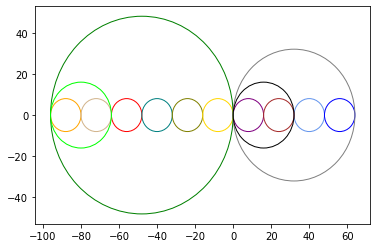

In [12]:
# draws the output space
paint_centroids(points=[],
                centroids=centroids_set_1,
                radii=radii_set_1,
                point_colors=None,
                centroid_colors=centroids_colors)

Uncomment this to train the model from scratch using these centroids as the output space

In [13]:
# from train_util import train_model

# centroid_net, hist = train_model(model=centroid_net,
#                                  dataloaders=dataloaders_dict,
#                                  optimizer=proposed_optimizer,
#                                  num_epochs=num_epochs,
#                                  loss_func="centroid",
#                                  centroids=centroids_set_1,
#                                  radii=radii_set_1,
#                                  device=device,
#                                  wandb=wandb,
#                                  save_path="model/epoch_30_centroid_net_set_1_04_28_21"
#                                 )

Alternatively, load a pre-trained model (trained for 30 epochs)

In [30]:
centroid_net.load_state_dict(torch.load('model/epoch_30_centroid_net_set_1_04_14_21'))
centroid_net.to(device)

CentroidNet(
  (extractor_net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

Sample 20 datapoints (from the same class) from the test set. Feel free play around with the sampled amount and the class to draw samples from. (Change the number to total_samples or sample_class)

In [49]:
from data_util import sample_from_modified_cifar10_dataset,make_2d_pred
# Grab samples of automobile
test_samples = sample_from_modified_cifar10_dataset(dataset=dataloaders_dict['val'].dataset,
                                                    total_samples=20,
                                                    sample_class=1,
                                                    random_state=RANDOM_STATE)

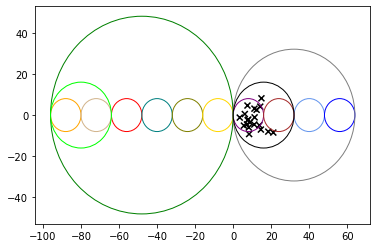

In [50]:
# Project them onto 2d and see where they land
test_2d_preds_set_1 = make_2d_pred(centroid_net,test_samples,device)
# visualize
paint_centroids(points=test_2d_preds_set_1,
                centroids=centroids_set_1,
                radii=radii_set_1,
                point_colors=None,
                centroid_colors=centroids_colors)

Evaluate the accuracy of the model (Takes about 1-2 minutes to evaluate)

In [17]:
from train_util import eval_model
test_loss_set_1,test_acc_set_1,test_f1_set_1,test_prc_set_1,test_rec_set_1 = eval_model(model=centroid_net,
                                dataloader=dataloaders_dict['val'],
                                loss_func="centroid",
                                centroids=centroids_set_1,
                                radii=radii_set_1,
                                device=device,
                                report_all=True
                               )

C:\Users\hoyin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(f"test loss using centroid set 1 after 30 epochs: {test_loss_set_1}")
print(f"test accuracy using centroid set 1 after 30 epochs: {test_acc_set_1}")
print(f"test f1 (averaged f1 from each class) using centroid set 1 after 30 epochs: {test_f1_set_1}")
print(f"test precision (averaged precision from each class) using centroid set 1 after 30 epochs: {test_prc_set_1}")
print(f"test recall (averaged recall from each class) using centroid set 1 after 30 epochs: {test_rec_set_1}")

test loss using centroid set 1 after 30 epochs: 14.709512452077865
test accuracy using centroid set 1 after 30 epochs: 0.37870000000000004
test f1 (averaged f1 from each class) using centroid set 1 after 30 epochs: 0.7083533333333334
test precision (averaged precision from each class) using centroid set 1 after 30 epochs: 0.8106166666666667
test recall (averaged recall from each class) using centroid set 1 after 30 epochs: 0.6601666666666666


## Centroid set 2

To evaluate the impact of the structure of the output space we change the location of each centorid but keep the same raii for each centroid

In [19]:
# Currently we hard code the centroids and radii.
# A function that automatically converts tree to centroids and radii will be provided in the future.

centroids_set_2 = torch.tensor([[16.,  -16.], # Centroid for airplane 
                          [24., 8.], # Centroid for automobile 
                          [-80., 0.], # Centroid for bird 
                          [-56.,  24.], # Centroid for cat 
                          [-72., -24.], # Centroid for deer 
                          [-40., 24.], # Centroid for dog 
                          [-32.,  -24.], # Centroid for frog 
                          [-16., 0.], # Centroid for horse 
                          [48., -16.], # Centroid for ship 
                          [40.,  8.], # Centroid for truck 
                          [-48., 0.], # Centroid for Animals
                          [-48., 24.], # Centroid for Domesticated 
                          [32.,  0.], # Centroid for Vehicles 
                          [32., 8.], # Centroid for Ground 
                         ])

radii_set_2 = torch.tensor([8,8,8,8,8,8,8,8,8,8,48,16,32,16])

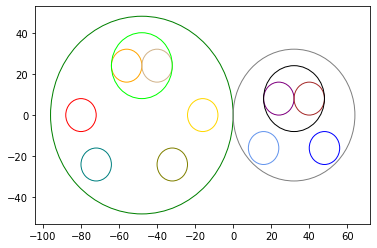

In [20]:
# draws the output space
paint_centroids(points=[],
                centroids=centroids_set_2,
                radii=radii_set_2,
                point_colors=None,
                centroid_colors=centroids_colors)

Uncomment this to train the model from scratch

In [21]:
# from train_util import train_model

# centroid_net, hist = train_model(model=centroid_net,
#                                  dataloaders=dataloaders_dict,
#                                  optimizer=proposed_optimizer,
#                                  num_epochs=num_epochs,
#                                  loss_func="centroid",
#                                  centroids=centroids_set_2,
#                                  radii=radii_set_2,
#                                  device=device,
#                                  wandb=wandb,
#                                  save_path="model/epoch_30_centroid_net_set_2_squared_loss_04_26_21"
#                                 )

Alternatively, load a pretrained model

In [22]:
centroid_net.load_state_dict(torch.load('model/epoch_30_centroid_net_set_2_04_26_21'))
centroid_net.to(device)

CentroidNet(
  (extractor_net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

Plotting using the same data points

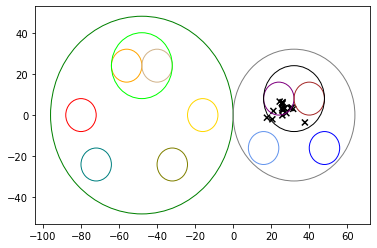

In [23]:
from data_util import sample_from_modified_cifar10_dataset,make_2d_pred
# Project them onto 2d and see where they land
test_2d_preds_set_2 = make_2d_pred(centroid_net,test_samples,device=device)
# visualize
paint_centroids(points=test_2d_preds_set_2,
                centroids=centroids_set_2,
                radii=radii_set_2,
                point_colors=None,
                centroid_colors=centroids_colors)

Evaluate the accuracy of the model (Takes about 1-2 minutes to evaluate)

In [24]:
from train_util import eval_model
test_loss_set_2,test_acc_set_2,test_f1_set_2,test_prc_set_2,test_rec_set_2 = eval_model(model=centroid_net,
                                dataloader=dataloaders_dict['val'],
                                loss_func="centroid",
                                centroids=centroids_set_2,
                                radii=radii_set_2,
                                device=device,
                                report_all=True
                               )

C:\Users\hoyin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(f"test loss using centroid set 2 after 30 epochs: {test_loss_set_2}")
print(f"test accuracy using centroid set 2 after 30 epochs: {test_acc_set_2}")
print(f"test f1 (averaged f1 from each class) using centroid set 2 after 30 epochs: {test_f1_set_2}")
print(f"test precision (averaged precision from each class) using centroid set 2 after 30 epochs: {test_prc_set_2}")
print(f"test recall (averaged recall from each class) using centroid set 2 after 30 epochs: {test_rec_set_2}")

test loss using centroid set 2 after 30 epochs: 12.96944978761673
test accuracy using centroid set 2 after 30 epochs: 0.3911
test f1 (averaged f1 from each class) using centroid set 2 after 30 epochs: 0.7469
test precision (averaged precision from each class) using centroid set 2 after 30 epochs: 0.8971166666666668
test recall (averaged recall from each class) using centroid set 2 after 30 epochs: 0.6751333333333333
